In [31]:
import numpy as np
import pandas as pd
from scipy.constants import hbar
from scipy.special import hermite
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.integrate import simps


In [2]:
mass = 0.1 #kg
omega = 1.0 #rad/s
nStates = 5 #numbers of energy levels
xRange = np.linspace(-5, 5, 500)

In [5]:
xRange[0:4]

array([-5.        , -4.97995992, -4.95991984, -4.93987976])

In [16]:
def energyLevel(n, omega, hbar=hbar):
    return hbar * omega *  (n + (1 / 2))

In [17]:
energies = [energyLevel(n, omega) for n in range(nStates)]

In [18]:
energies

[5.272859088230782e-35,
 1.5818577264692348e-34,
 2.636429544115391e-34,
 3.6910013617615478e-34,
 4.7455731794077044e-34]

In [19]:
alpha = np.sqrt(mass * omega / hbar)
alpha

3.079370319150863e+16

In [22]:
def waveFunction(n,x, alpha=alpha):
    coefficient = 1 / np.sqrt(2 ** n * np.math.factorial(n))
    hermitePoly = hermite(n)
    psi = coefficient * (alpha * np.pi) ** 0.25 * hermitePoly(np.sqrt(alpha) * x) * np.exp(-alpha * x ** 2 / 2)
    return psi

In [23]:
waveFunctions = {n : waveFunction(n, xRange) for n in range(nStates)}
probabilities = {n : np.abs(waveFunctions[n])**2 for n in range(nStates)}

/var/folders/wk/1xrkh8515pzdl8y0bcv46yzc0000gn/T/ipykernel_49369/2261961488.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coefficient = 1 / np.sqrt(2 ** n * np.math.factorial(n))


In [32]:
def expectationValues(func, psi, x):
    probability_density = np.abs(psi)**2
    integrand = func(x) * probability_density
    return simps(integrand, x)

In [34]:
positionExpectation = {n: expectationValues(lambda x: x, waveFunctions[n], xRange) for n in range(nStates)}

/var/folders/wk/1xrkh8515pzdl8y0bcv46yzc0000gn/T/ipykernel_49369/3299467957.py:4: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  return simps(integrand, x)


In [35]:
def momentumExpectation(n):
    psi = waveFunction(n, xRange)
    d_psi = np.gradient(psi, xRange)
    momentum = -1j * hbar * d_psi
    return np.sum(psi.conj() * momentum).real

momentumExpectations = {n: momentumExpectation(n) for n in range(nStates)}

/var/folders/wk/1xrkh8515pzdl8y0bcv46yzc0000gn/T/ipykernel_49369/2261961488.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coefficient = 1 / np.sqrt(2 ** n * np.math.factorial(n))


In [36]:
def timeEvolution(n, t, x):
    psi = waveFunction(n, x)
    energy = energyLevel(n, omega)
    return psi * np.exp(-1j * energy * t / hbar)

timeRange = np.linspace(0, 10, 200)
timeDependentProbabilities = {
    t: {n: np.abs(timeEvolution(n, t, xRange))**2 for n in range(nStates)}
    for t in timeRange
}


/var/folders/wk/1xrkh8515pzdl8y0bcv46yzc0000gn/T/ipykernel_49369/2261961488.py:2: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coefficient = 1 / np.sqrt(2 ** n * np.math.factorial(n))


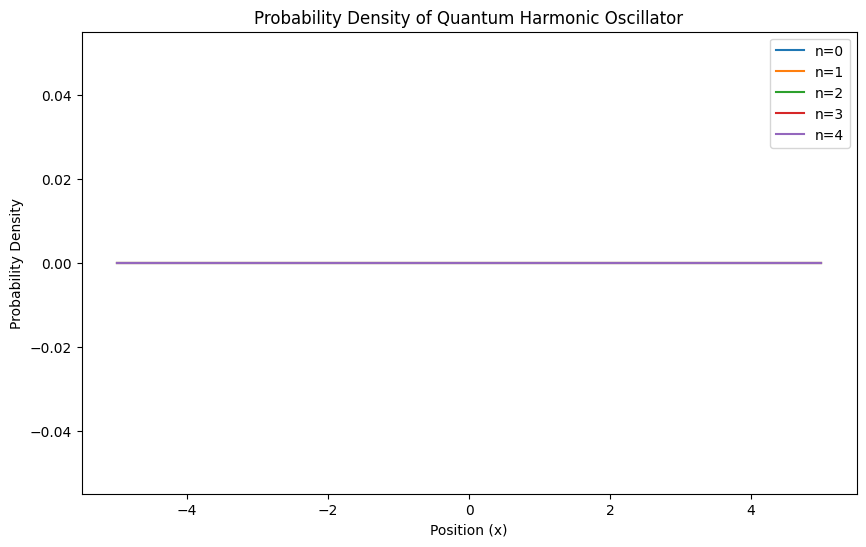

In [37]:
plt.figure(figsize=(10, 6))
for n in range(nStates):
    plt.plot(xRange, probabilities[n], label=f'n={n}')
plt.title('Probability Density of Quantum Harmonic Oscillator')
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


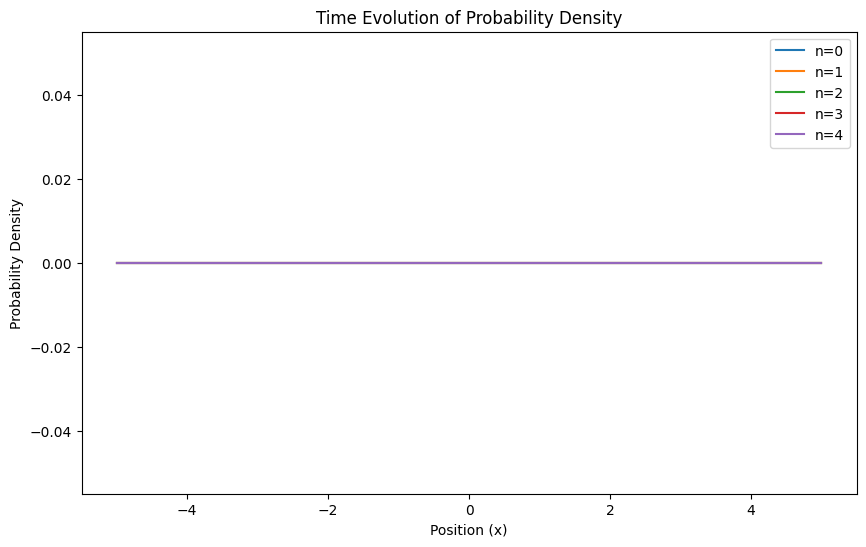

In [38]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 6))
lines = [ax.plot(xRange, timeDependentProbabilities[0][n], label=f'n={n}')[0] for n in range(nStates)]
ax.set_title('Time Evolution of Probability Density')
ax.set_xlabel('Position (x)')
ax.set_ylabel('Probability Density')

def update(frame):
    for n, line in enumerate(lines):
        line.set_ydata(timeDependentProbabilities[timeRange[frame]][n])
    return lines

ani = FuncAnimation(fig, update, frames=len(timeRange), interval=50)
plt.legend()
plt.show()
